The Hypergeometric distribution is a discrete probability distribution that describes the likelihood of a certain number of "successes" in a sample drawn without replacement from a finite population

🧠 Basic Concept
Imagine a population of 
𝑁
N items:

𝐾
K of them are labeled as "successes"

𝑁
−
𝐾
N−K are "failures" Now, you draw 
𝑛
n items from this population without putting any back. The hypergeometric distribution tells you the probability of getting exactly 
𝑘
k successes in your draw.

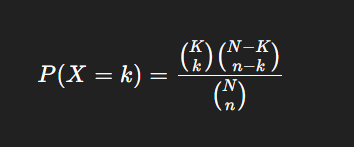

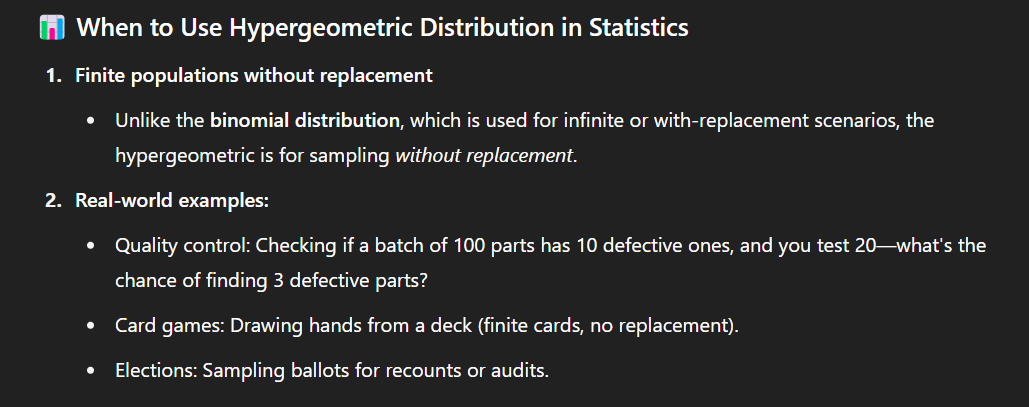

In [1]:
import numpy as np
from scipy import stats

In [2]:
import pandas as pd
df=pd.read_csv('hypergeometric_email_dataset.csv')
df.head()

,Email_ID,Label
0,email_1,ham
1,email_2,ham
2,email_3,ham
3,email_4,ham
4,email_5,ham


In [5]:
df['Label'].value_counts()

Label
ham     80
spam    20
Name: count, dtype: int64

In [8]:
df.shape

(100, 2)

In [9]:
prob_emailSpam=df['Label'].value_counts()[1]/df.shape[0]
prob_emailNotScam=df['Label'].value_counts()[0]/df.shape[0]

C:\Users\Rahul\AppData\Local\Temp\ipykernel_9316\3470220538.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_emailSpam=df['Label'].value_counts()[1]/df.shape[0]
C:\Users\Rahul\AppData\Local\Temp\ipykernel_9316\3470220538.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_emailNotScam=df['Label'].value_counts()[0]/df.shape[0]


In [10]:
N=df.shape[0] # Total number of email
A=df['Label'].value_counts()[1]  # Total items of intrest in population
n=15 # Randomly selecting 15 emails ---> sample size

C:\Users\Rahul\AppData\Local\Temp\ipykernel_9316\1431652951.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A=df['Label'].value_counts()[1]  # Total items of intrest in population


In [19]:
x=np.arange(0,min(A,n)+1)  # min(20,15)==15 -> why taken min(A,n)+1 because arange() goes from 0 to n-1
pmf=stats.hypergeom.pmf(x,N,A,n)  
pmf

array([2.61936917e-02, 1.19062235e-01, 2.36347422e-01, 2.71104396e-01,
       2.00381510e-01, 1.00763273e-01, 3.54800259e-02, 8.87000647e-03,
       1.57959019e-03, 1.99227592e-04, 1.75320281e-05, 1.04856627e-06,
       4.08532314e-08, 9.66940389e-10, 1.22397518e-11, 6.11987588e-14])

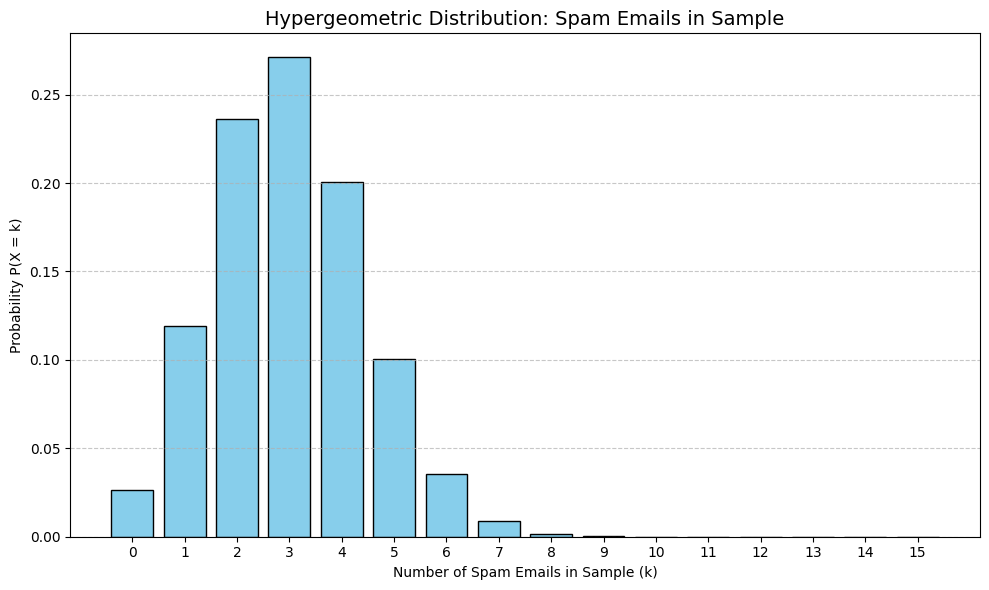

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title("Hypergeometric Distribution: Spam Emails in Sample", fontsize=14)
plt.xlabel("Number of Spam Emails in Sample (k)")
plt.ylabel("Probability P(X = k)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(x)
plt.tight_layout()
plt.show()

In [20]:
cdf_values=stats.hypergeom.cdf(x,N,A,n)
cdf_values

array([0.02619369, 0.14525593, 0.38160335, 0.65270774, 0.85308925,
       0.95385253, 0.98933255, 0.99820256, 0.99978215, 0.99998138,
       0.99999891, 0.99999996, 1.        , 1.        , 1.        ,
       1.        ])

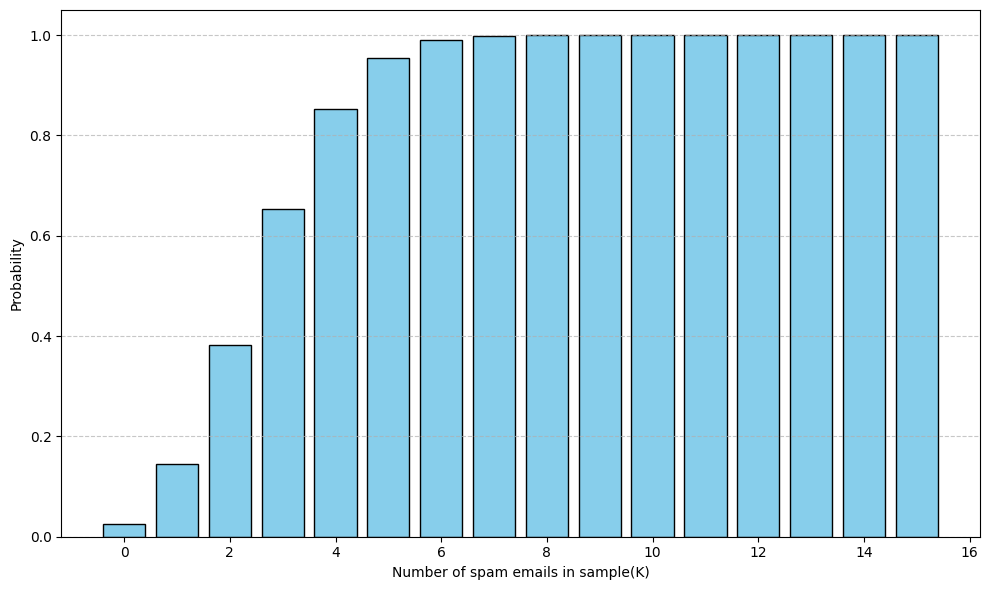

In [22]:
plt.figure(figsize=(10,6))
plt.bar(x,cdf_values,color='skyblue',edgecolor='black')
plt.xlabel('Number of spam emails in sample(K)')
plt.ylabel('Probability')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

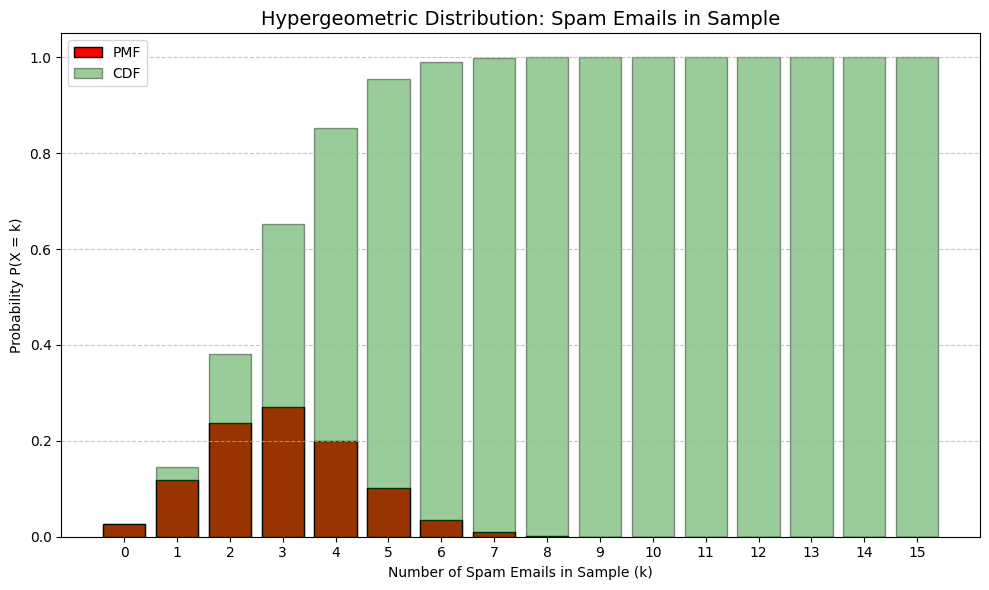

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(x, pmf, color='red', edgecolor='black',label='PMF')
plt.bar(x,cdf_values,color='green',edgecolor='black',label='CDF',alpha=0.4)
plt.title("Hypergeometric Distribution: Spam Emails in Sample", fontsize=14)
plt.xlabel("Number of Spam Emails in Sample (k)")
plt.legend(loc='upper left')
plt.ylabel("Probability P(X = k)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(x)
plt.tight_layout()
plt.show()